In [1]:
import glob
import heapq
import os
import pandas as pd
import matplotlib.pyplot as plt

from app.settings import Settings



In [9]:
settings = Settings()

list_of_files = glob.glob(os.path.join(settings.file_system.benchmark_path, '*.csv')) # 
number_of_elements = 10

latest_files = heapq.nlargest(number_of_elements, list_of_files,  key=os.path.getctime)

print(latest_files)

['/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-19T12_47_53.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-19T12_47_09.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-19T12_46_10.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-19T12_45_27.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-19T12_42_05.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-19T12_24_15.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-19T12_23_26.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-01T11_04_14.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-01T10_01_32.csv', '/Users/alexbradner/code/datasetter/app/benchmarks/2021-07-01T09_54_32.csv']


In [10]:
dfs = []
for file in latest_files:
    dfs.append(pd.read_csv(file))

In [11]:
df_concat = pd.concat(dfs)
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()

In [12]:
df_means

,Unnamed: 0,boundary_times,boundary_processing_times,boundary_hits,geohash_times,geohash_processing_times,geohash_hits
0,0,0.170418,11.1,1904.0,0.102080,8.0,1917.0
1,1,0.111655,10.2,1780.5,0.127200,7.5,1800.3
2,2,0.111082,11.1,1860.2,0.125792,6.7,1879.1
3,3,0.123998,11.1,1997.7,0.094547,7.0,2021.8
4,4,0.124155,7.4,2034.3,0.095103,7.5,2044.5
...,...,...,...,...,...,...,...
95,95,0.101901,9.8,1957.0,0.092475,6.7,2005.4
96,96,0.092688,9.1,1881.2,0.091799,6.7,1925.5
97,97,0.110144,9.6,1994.4,0.105660,7.5,2027.7
98,98,0.148511,9.0,1957.0,0.140717,7.5,1988.1


<Figure size 432x288 with 0 Axes>

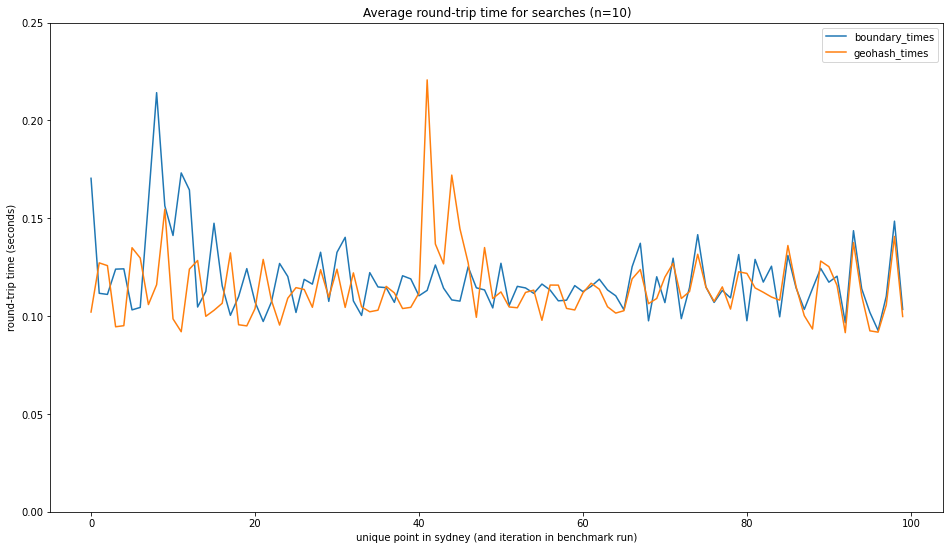

In [30]:
plt.figure()
df_means[['boundary_times','geohash_times']].plot(figsize=(16, 9), title='Average round-trip time for searches (n=10)', ylim=(0,0.25))
plt.xlabel('unique point in sydney (and iteration in benchmark run)')
plt.ylabel('round-trip time (seconds)')
plt.show()



<Figure size 432x288 with 0 Axes>

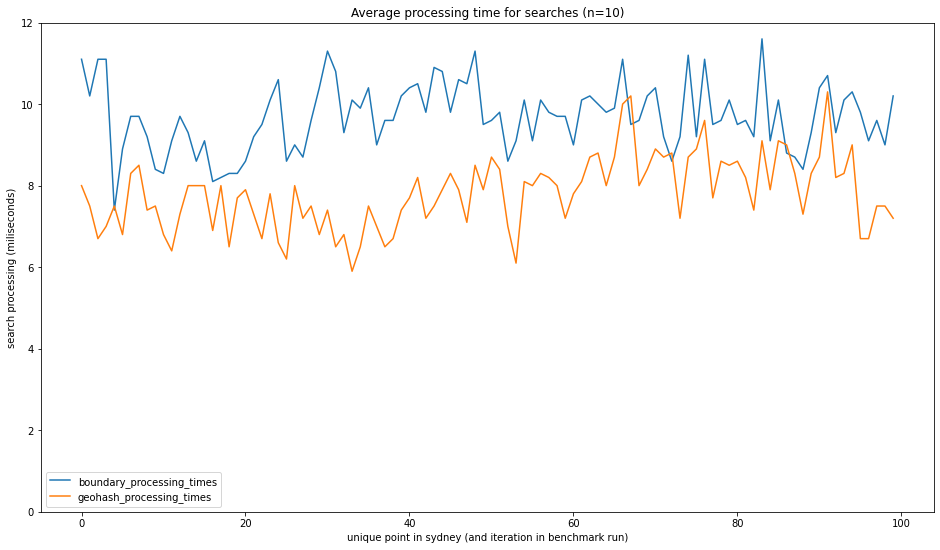

In [31]:
plt.figure()
df_means[['boundary_processing_times','geohash_processing_times']].plot(figsize=(16, 9), title='Average processing time for searches (n=10)', ylim=(0,12))
plt.xlabel('unique point in sydney (and iteration in benchmark run)')
plt.ylabel('search processing (miliseconds)')
plt.show()

<Figure size 432x288 with 0 Axes>

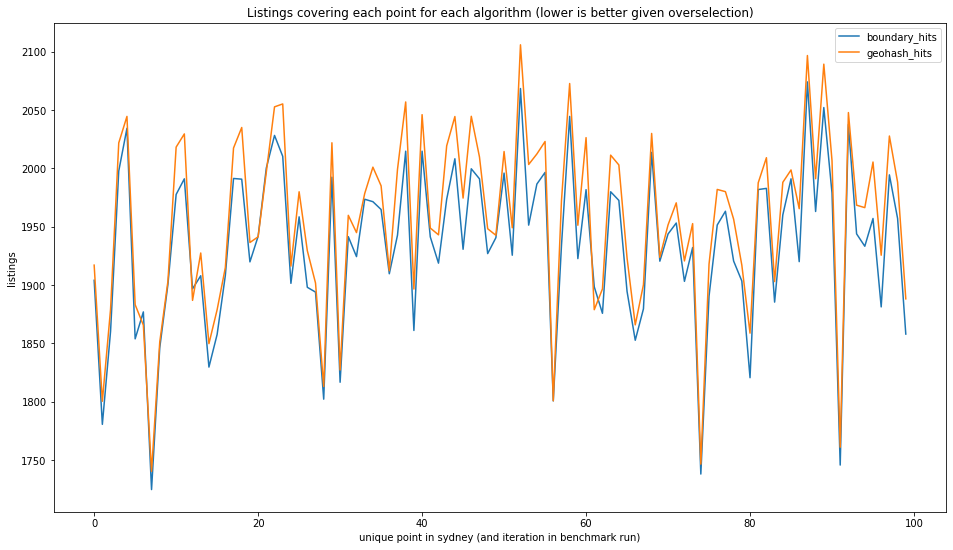

In [28]:
plt.figure()
df_means[['boundary_hits','geohash_hits']].plot(figsize=(16, 9), title='Listings covering each point for each algorithm (lower is better given overselection)')
plt.xlabel('unique point in sydney (and iteration in benchmark run)')
plt.ylabel('listings')
plt.show()
